In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import scipy.linalg  

%matplotlib inline

#### 6.2 Найти псевдорешение системы:

$x+2y-z=1$

$3x-4y=7$

$8x-5y+2z=12$

$2x-5z=7$

$11x+4y-7z=15$

In [3]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15]) 
np.linalg.matrix_rank(A, 0.0001)

3

Система несовместная.

In [4]:
X = np.linalg.lstsq(A, B, rcond=None)[0]
X

array([ 1.13919353, -0.90498444, -0.9009803 ])

#### 6.4 Посчитать LU-разложение матрицы:
$A = \left(
\begin{array}{cccc}
1 & 2 & 3\\
2 & 16 & 21\\
7 & 28 & 9
\end{array}
\right)
$

In [7]:
A = np.array([[1, 2, 3], [2, 16, 21], [7, 28, 9]])
P, L, U = scipy.linalg.lu(A)

print(P)
print(L)
print(U)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[ 1.          0.          0.        ]
 [ 0.28571429  1.          0.        ]
 [ 0.14285714 -0.25        1.        ]]
[[ 7.         28.          9.        ]
 [ 0.          8.         18.42857143]
 [ 0.          0.          6.32142857]]


- Придумать вектор правых частей и решить линейную систему.

In [8]:
# ранг матрицы = 3
np.linalg.det(A)

-353.99999999999994

Ранг матрицы равен числу неизвестных, система совместная, для любого вектора B (кроме нулевого) будет иметь единственное решение.

In [10]:
B = np.array([1, 2, 4])

X = np.linalg.solve(A, B.reshape((3, 1)))  
X

array([[ 0.94915254],
       [-0.12711864],
       [ 0.10169492]])

In [11]:
np.dot(A, X)

array([[1.],
       [2.],
       [4.]])

#### 6.5 Найти нормальное псевдорешение системы:

$x + 2y - z = 1\\
9x - 5y + 2z = 12$

Выразим z и y через x.
- из первого уравнения:

$z = x + 2y - 1$ - подставим во второе

$9x - 5y + 2x + 4y - 2 = 12\\
11x - y = 14\\
y = 11x - 14$

- подставим полученный y в уравнение для z:

$z = x + 22x - 28 -1\\
z = 23x - 29$

In [12]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

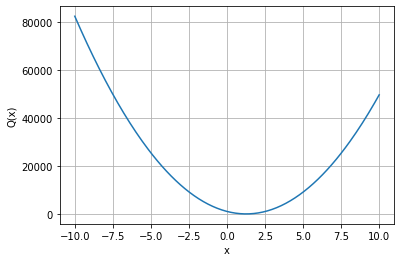

In [13]:
x = np.linspace(-10, 10, 200)
plt.plot(x, Q(x, 11 * x - 14, 23 * x - 29))
plt.xlabel('x')
plt.ylabel('Q(x)')
plt.grid(True);

In [14]:
A = np.array([[1, 2, -1], [9, -5, 2]])
B = np.array([1, 12])
X = np.linalg.lstsq(A, B, rcond=-1)[0]
X

array([ 1.26113671, -0.12749616,  0.00614439])

#### 6.6 Найдите псевдорешение вырожденной линейной системы:

$\left(
\begin{matrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{matrix}
\right) \cdot X = 
\left(
\begin{matrix}
2\\
5\\
11
\end{matrix}
\right)
$

Ранг основной матрицы A = 2, ранг расширенной матрицы = 3, существует бесконечное множество псевдорешений.

In [15]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)
 
print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[ -8.1240384   -9.6011363  -11.07823419]
 [  0.           0.90453403   1.80906807]
 [  0.           0.           0.        ]]


In [16]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [18]:
B1 = np.dot(Q.T, B)[:2]
B1

array([-1.21860576e+01,  1.33226763e-15])

In [19]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 1.47287728e-15])

In [20]:
# одно из псевдорешений
X = np.append(X1, 0)
print (X)
np.linalg.norm(X), np.linalg.norm(np.dot(A, X) - B)

[1.50000000e+00 1.47287728e-15 0.00000000e+00]


(1.499999999999999, 1.2247448713915883)

Или:

- Возьмём первое уравнение, вычтем из 3го 2е и разделм на 3.
$x + 2y + 3z = 2\\
x + y + z = 2$

- Выпишем y и z через x из полученных уравнений:

из второго:
$z = 2 - x - y$

подставим в первое:
$x + 2y + 6 - 3x - 3y = 6\\
-2x - y = 0\\
y = -2x$

подставим выведенный y в уравнение для z:
$z = 2 - x + 2x\\
z = 2 + x$

In [25]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

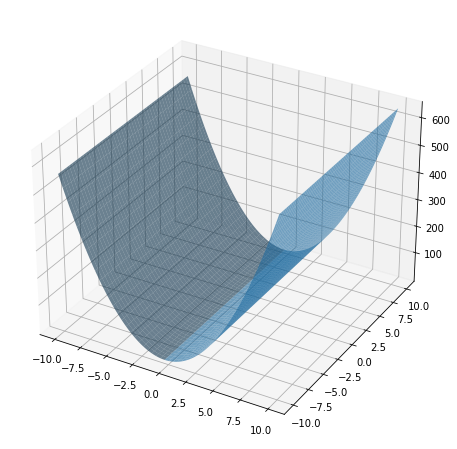

In [30]:
X = np.linspace(-10, 10, 200)
Y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(X, Y)
Z = Q(X, -2 * X, 2 + X)

fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111)
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, alpha = 0.6)

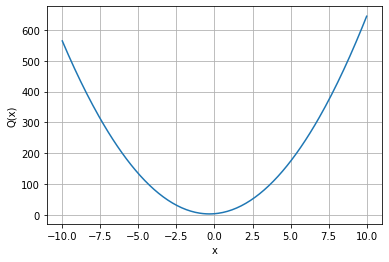

In [31]:
x = np.linspace(-10, 10, 200)
plt.plot(x, Q(x, -2 * x, 2 + x))
plt.xlabel('x')
plt.ylabel('Q(x)')
plt.grid(True);

In [32]:
X_norm = np.linalg.lstsq(A, B, rcond=-1)[0]
X_norm

array([ 1.25,  0.5 , -0.25])

In [33]:
np.linalg.norm(X_norm), np.linalg.norm(np.dot(A, X_norm) - B)

(1.369306393762912, 1.2247448713915883)